In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df=pd.read_csv("winequality-red.csv")

In [215]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [217]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [218]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [219]:
df.columns
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target="quality"

In [220]:
for column in features:
    vc=df[column].value_counts()
    print(column," ",vc)
    

fixed acidity   fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
volatile acidity   volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
citric acid   citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
residual sugar   residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
chlorides   chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
fr

In [221]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [222]:
df=df.drop_duplicates()

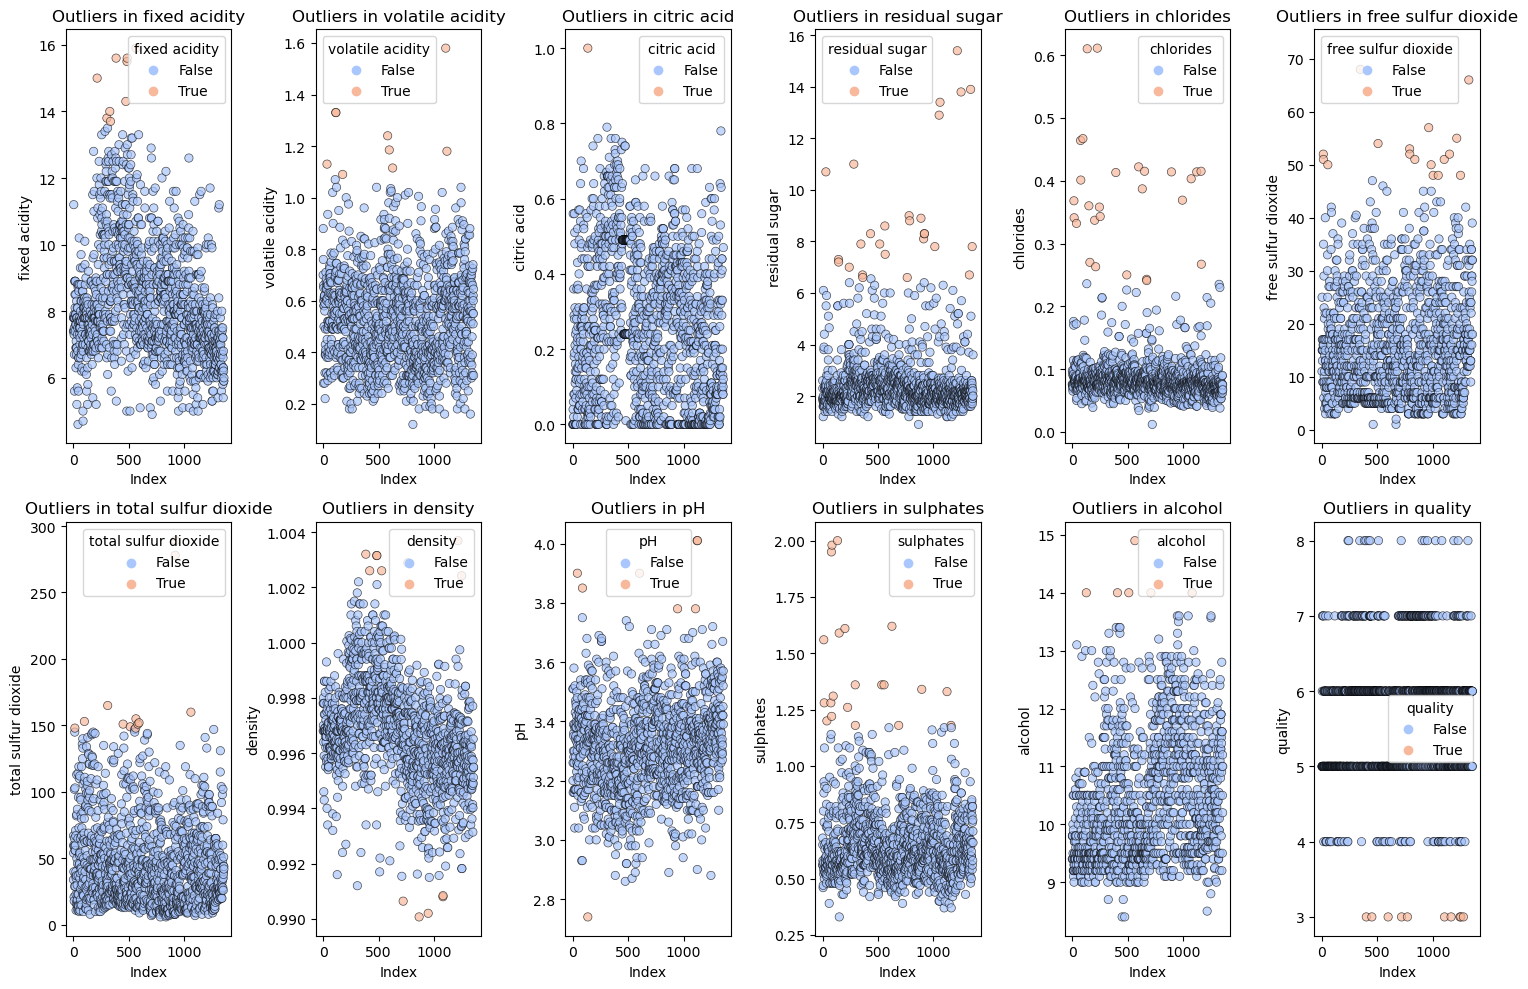

In [223]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate Z-scores for each column
z_scores = stats.zscore(df, axis=0)

# Set a threshold for identifying outliers (e.g., 3)
threshold = 3

# Identify outliers for each column
outliers = np.abs(z_scores) > threshold

# Convert the outliers array to a DataFrame for visualization
outliers_df = pd.DataFrame(outliers, columns=df.columns)

# Plotting outliers using Seaborn
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    
    plt.subplot(2, int(np.ceil(len(df.columns) / 2)), i + 1)
    sns.scatterplot(x=np.arange(len(df)), y=df[col], hue=outliers_df[col], palette='coolwarm', edgecolor='k', alpha=0.7)
    plt.title(f'Outliers in {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [224]:
df_no_outlire=(z_scores>threshold).any(axis=1)

In [225]:
df_new=df[~df_no_outlire]


In [226]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [227]:
df_new[target].value_counts()

quality
5    525
6    493
7    155
4     47
8     15
3      7
Name: count, dtype: int64

inbalance data


fixed acidity


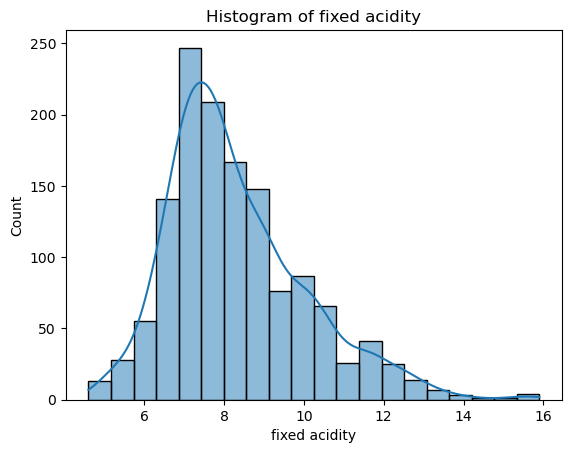

volatile acidity


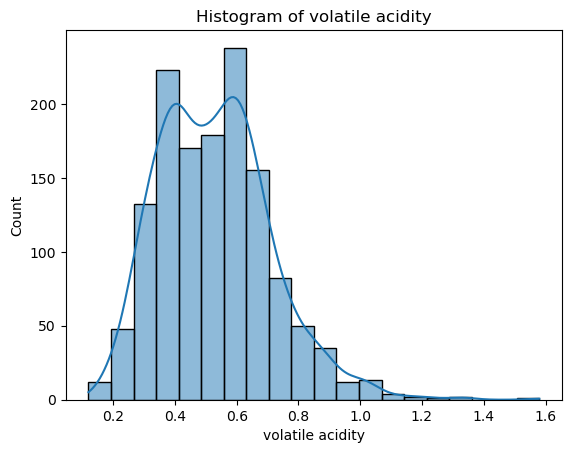

citric acid


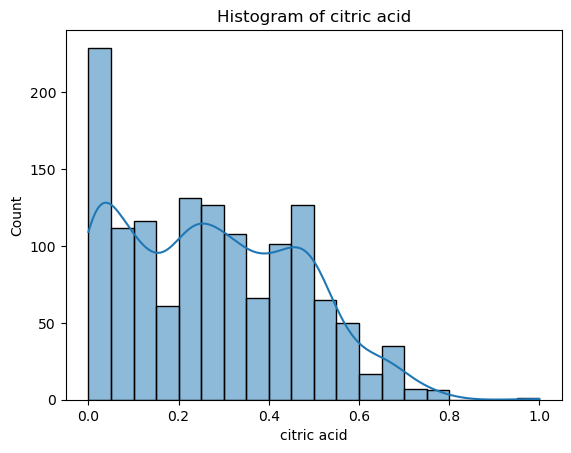

residual sugar


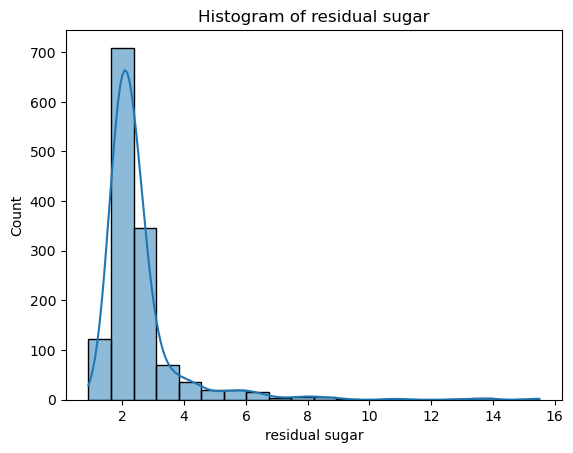

chlorides


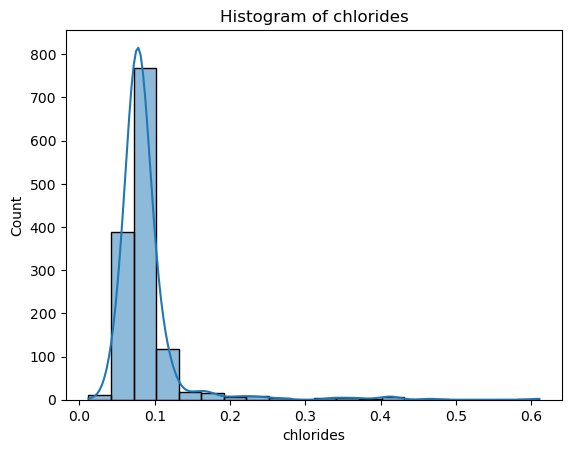

free sulfur dioxide


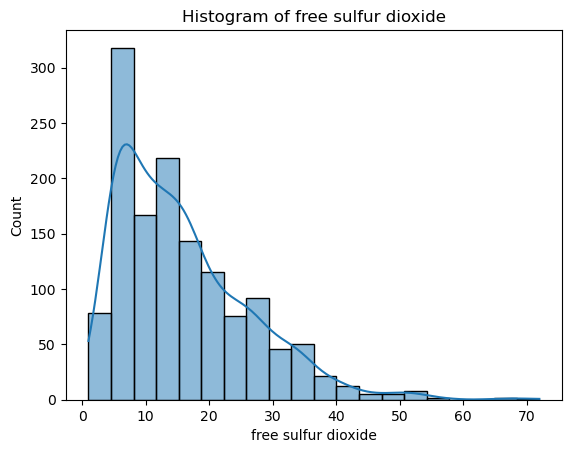

total sulfur dioxide


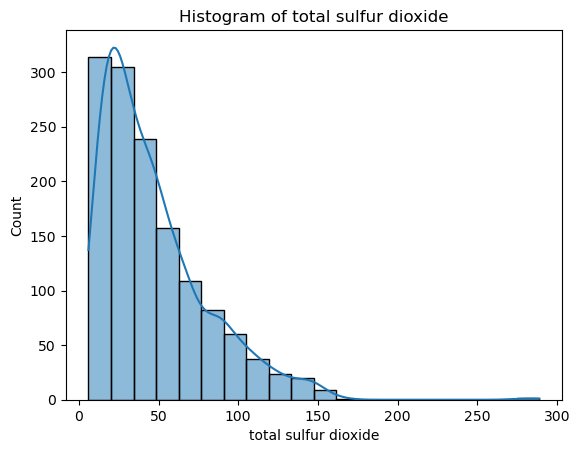

density


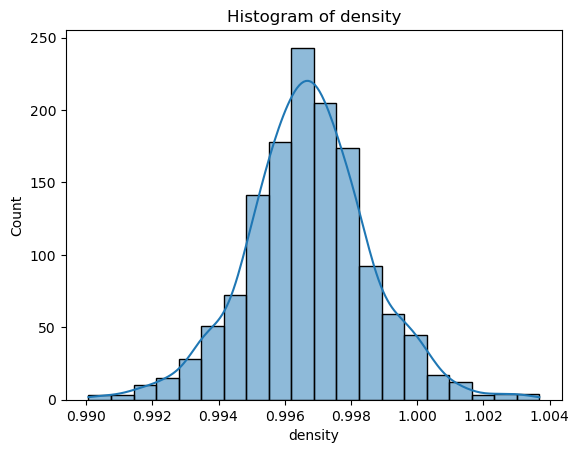

pH


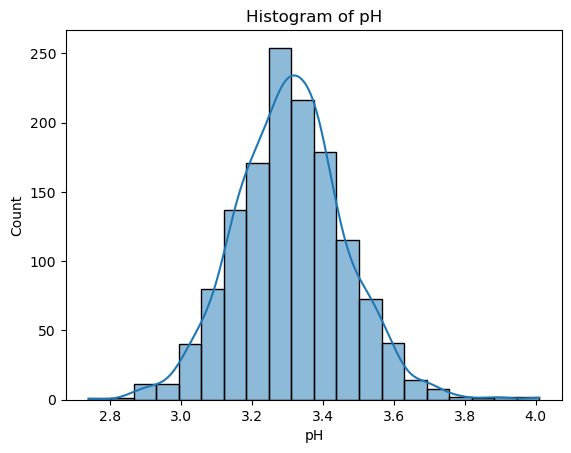

sulphates


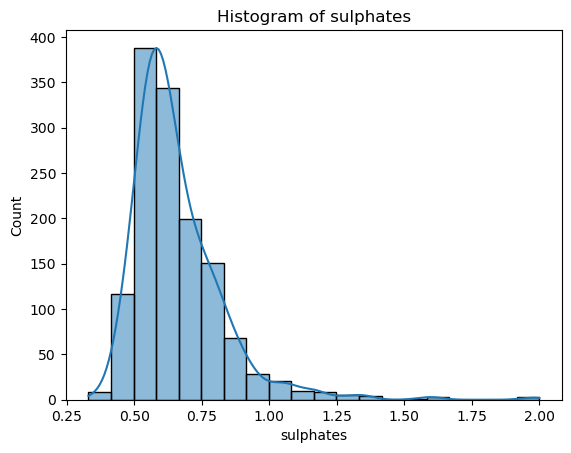

alcohol


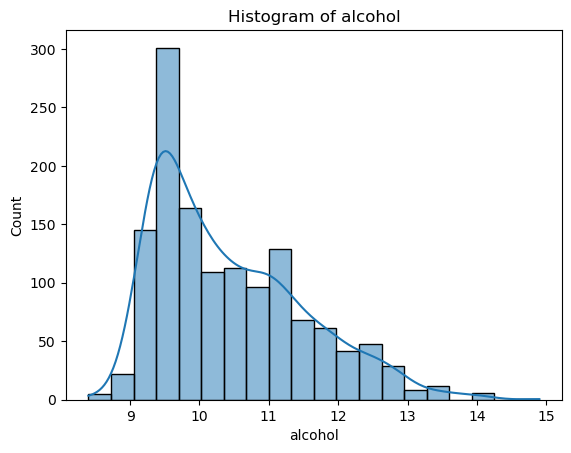

In [228]:
for column in features:
    print(column)
    sns.histplot(df[column],bins=20,kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

fixed acidity


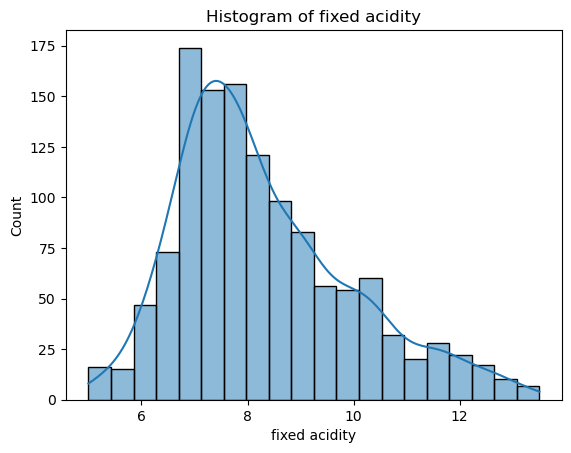

volatile acidity


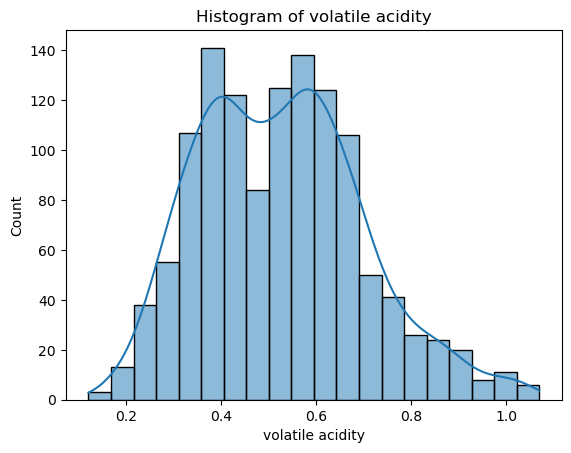

citric acid


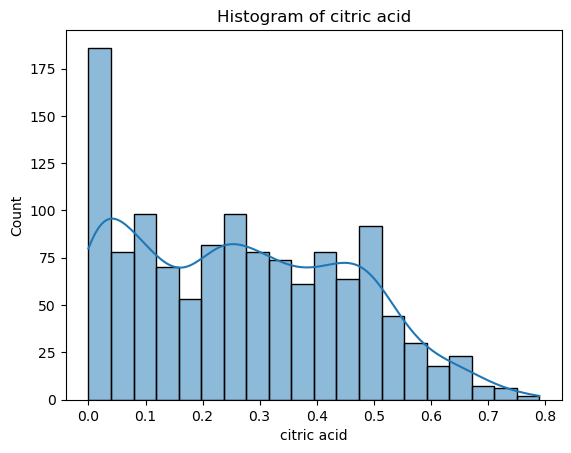

residual sugar


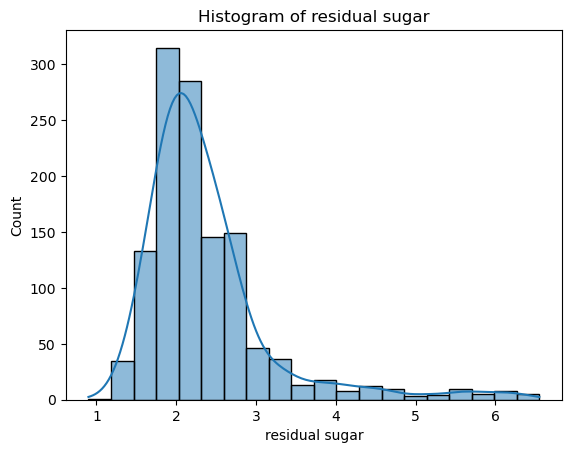

chlorides


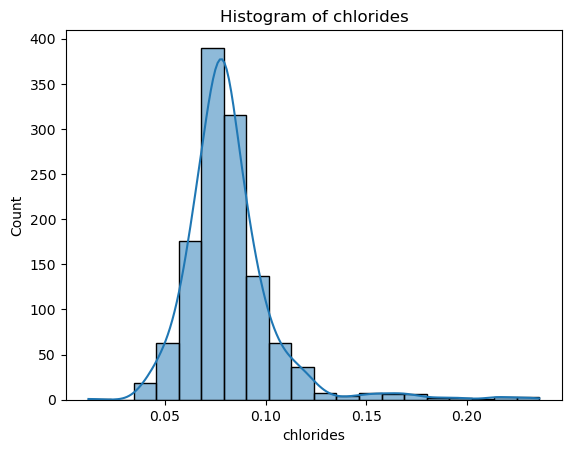

free sulfur dioxide


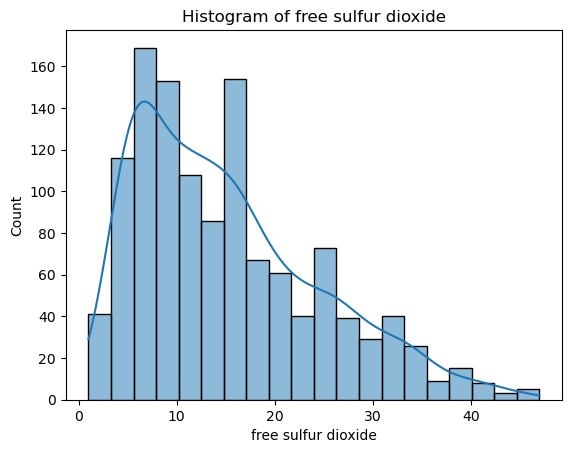

total sulfur dioxide


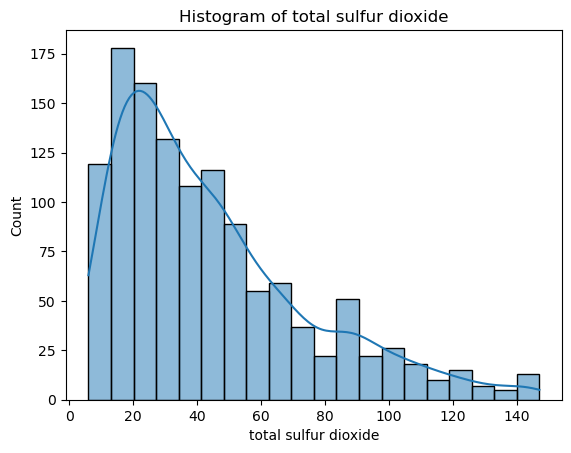

density


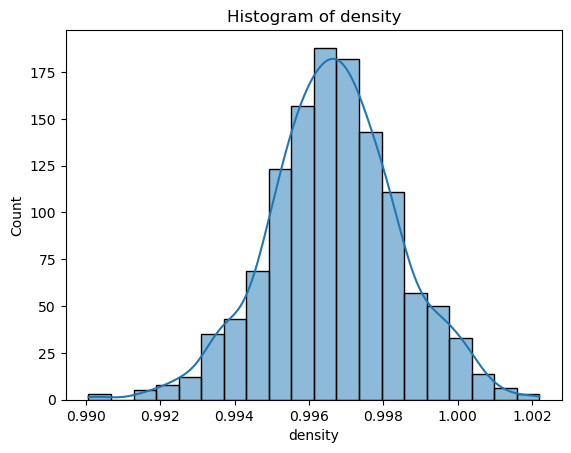

pH


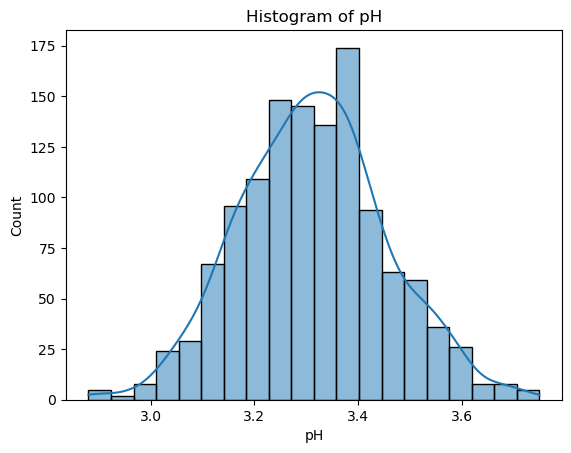

sulphates


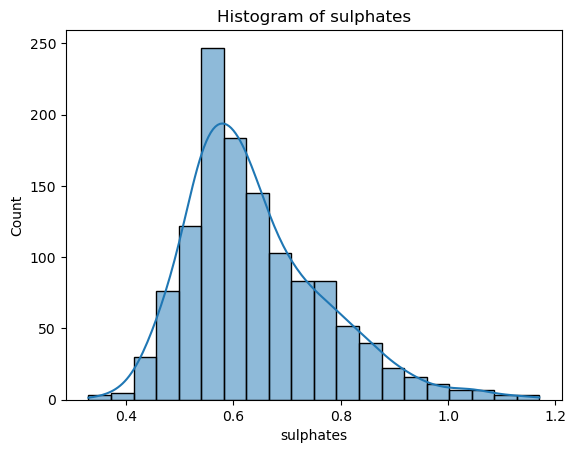

alcohol


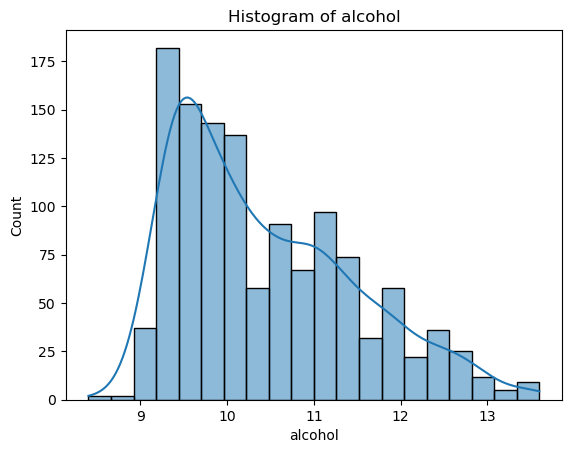

In [229]:
for column in features:
    print(column)
    sns.histplot(df_new[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


fixed acidity


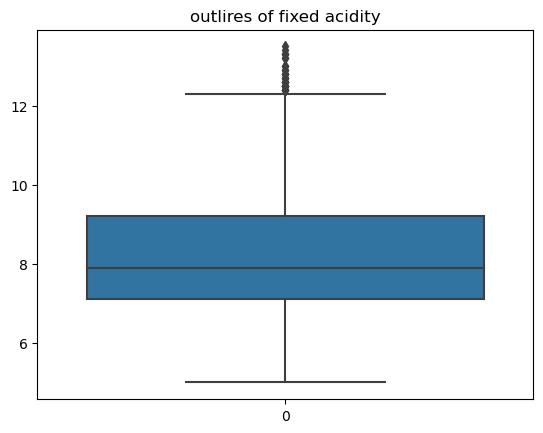

volatile acidity


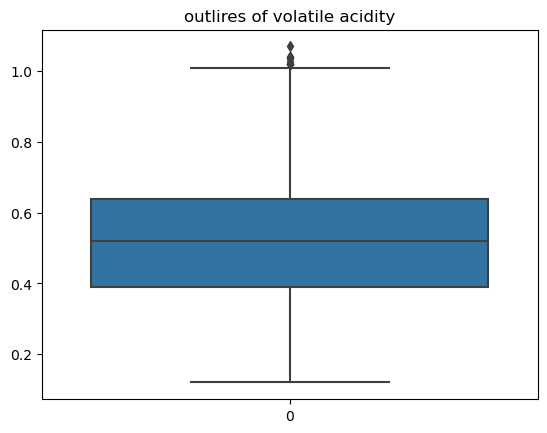

citric acid


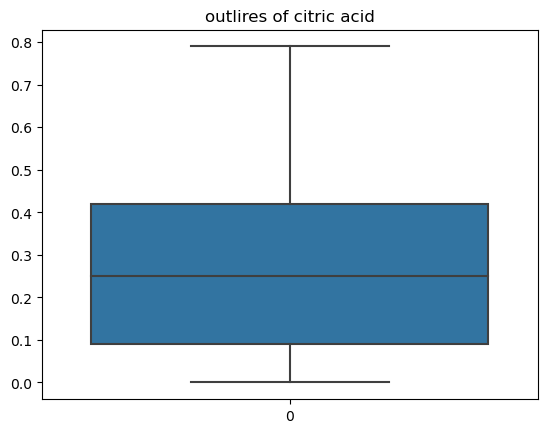

residual sugar


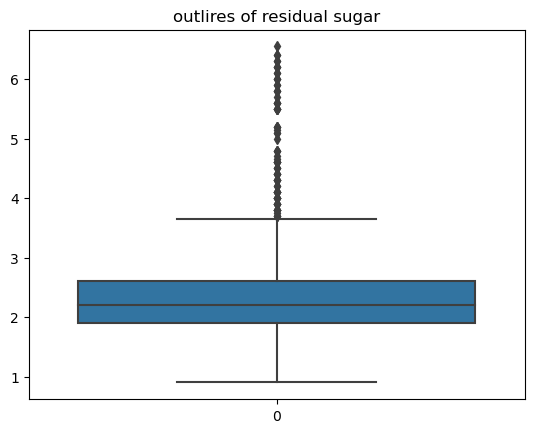

chlorides


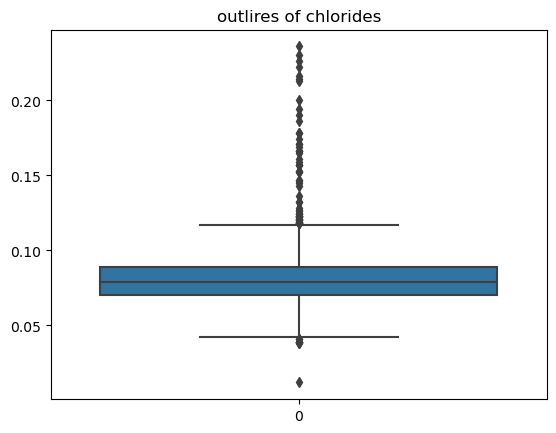

free sulfur dioxide


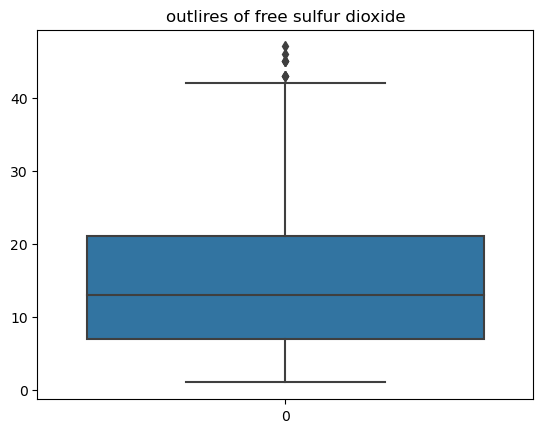

total sulfur dioxide


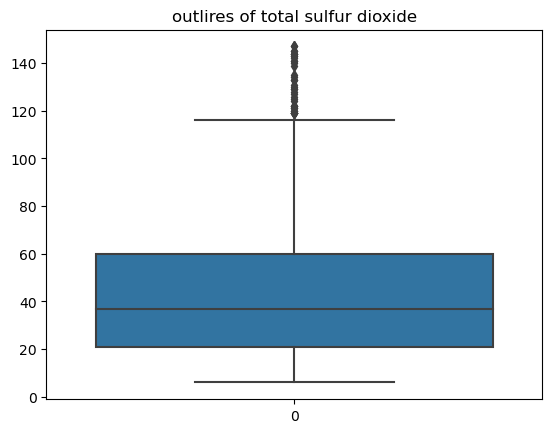

density


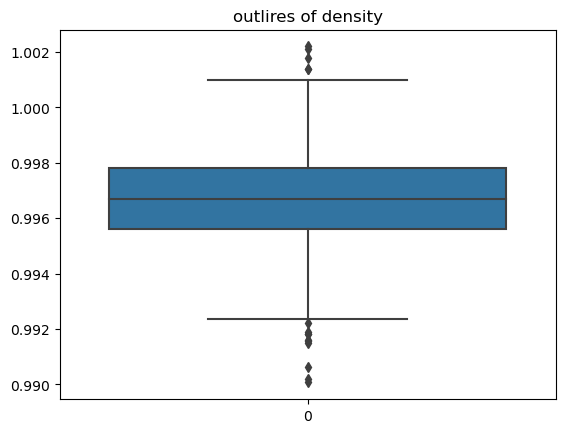

pH


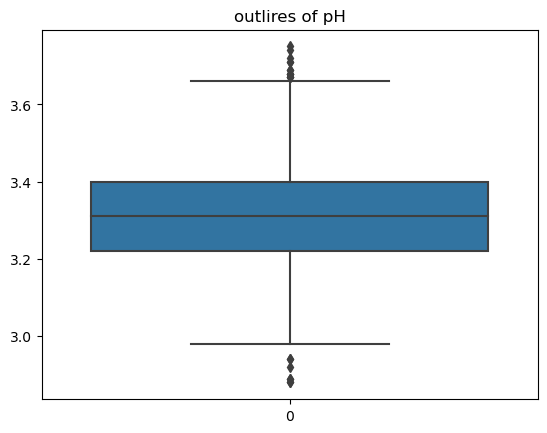

sulphates


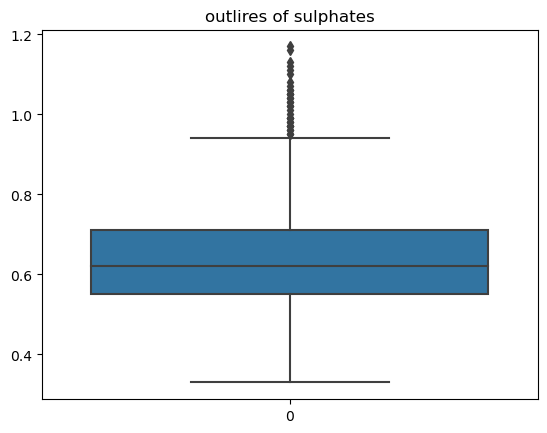

alcohol


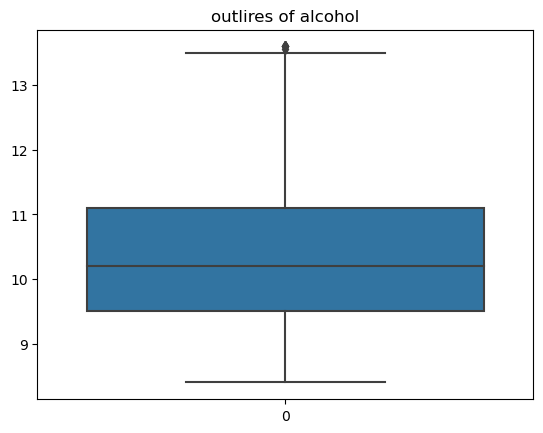

In [230]:
for column in features:
    print(column)
    sns.boxplot(df_new[column])
    plt.title(f'outlires of {column}')
    plt.show()

In [231]:
df_no_outlires=pd.DataFrame()
df_demo=[]

In [232]:
mask_no_outliers = pd.Series(True, index=df.index)
df_copy=df.copy()
for column in features:
    Q1=df_copy[column].quantile(0.25)
    Q3=df_copy[column].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    #df_copy=df_copy[(df[column] >= lower_bound)&(df[column<=upper_bound])].copy()
    df_copy = df_copy[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()


C:\Users\yaris\AppData\Local\Temp\ipykernel_29344\4009037198.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
C:\Users\yaris\AppData\Local\Temp\ipykernel_29344\4009037198.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
C:\Users\yaris\AppData\Local\Temp\ipykernel_29344\4009037198.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
C:\Users\yaris\AppData\Local\Temp\ipykernel_29344\4009037198.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
C:\Users\yaris\AppData\Local\Temp\ipykernel_29344\4009037198.py:10: UserWarning:

In [233]:
df_copy.shape

(985, 12)

In [234]:
df_copy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,8.138579,0.522695,0.247949,2.188934,0.078129,14.719797,41.176650,0.996507,3.324579,0.628853,10.395381,5.643655
std,1.460696,0.168185,0.182103,0.448518,0.014966,8.574557,25.201208,0.001583,0.131157,0.111660,0.990583,0.772970
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992400,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.068000,8.000000,22.000000,0.995500,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996500,3.320000,0.610000,10.100000,6.000000
75%,9.000000,0.635000,0.400000,2.500000,0.087000,20.000000,55.000000,0.997480,3.410000,0.700000,11.100000,6.000000
max,12.300000,1.010000,0.730000,3.650000,0.121000,40.000000,114.000000,1.000400,3.680000,0.940000,13.400000,8.000000


In [235]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [236]:
df_new["quality"].value_counts()

quality
5    525
6    493
7    155
4     47
8     15
3      7
Name: count, dtype: int64

In [237]:
for column in features:
    print(column)
    sns.boxplot(df_no_outlires[column])
    plt.title(f'outlires of {column}')
    plt.show()

fixed acidity


KeyError: 'fixed acidity'

fixed acidity


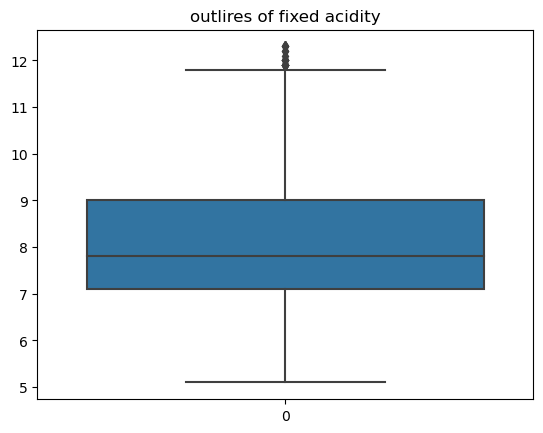

volatile acidity


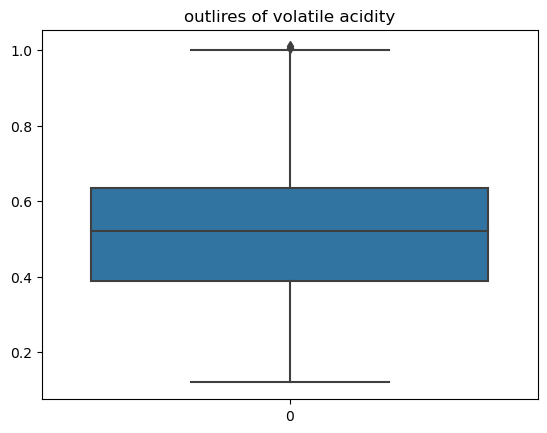

citric acid


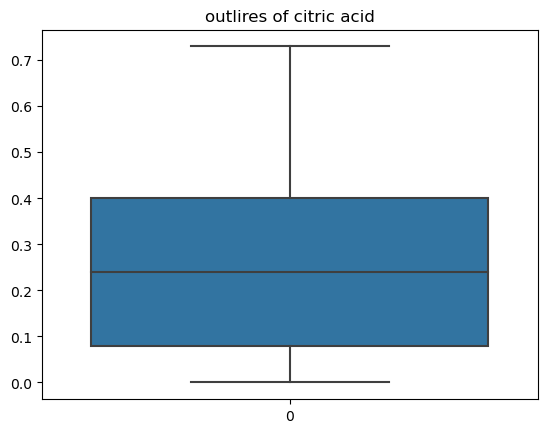

residual sugar


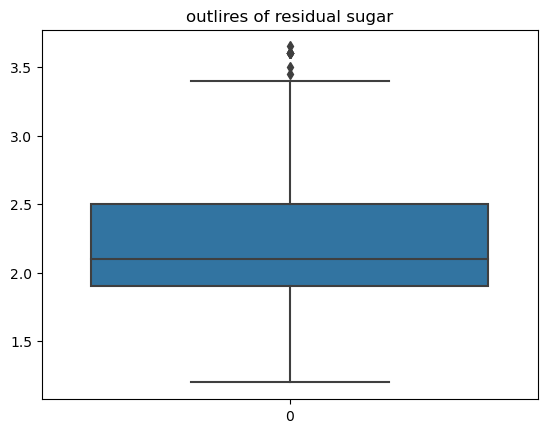

chlorides


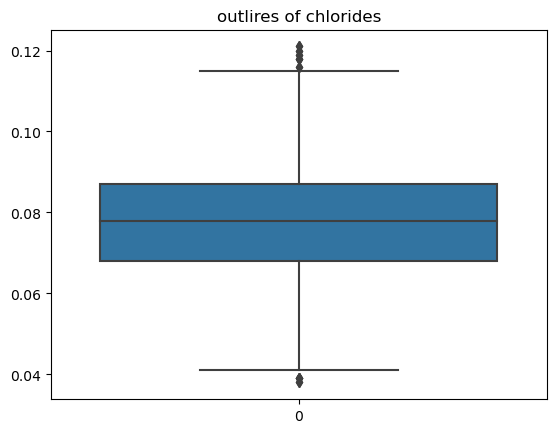

free sulfur dioxide


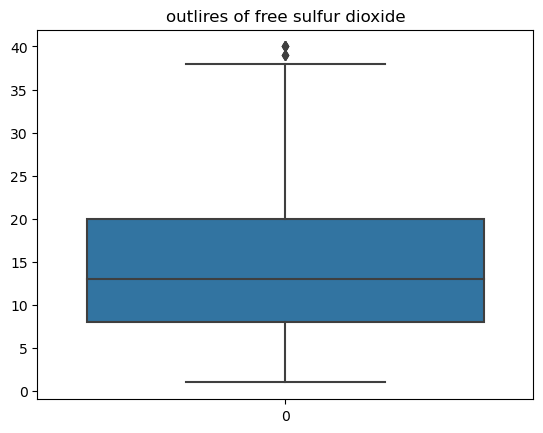

total sulfur dioxide


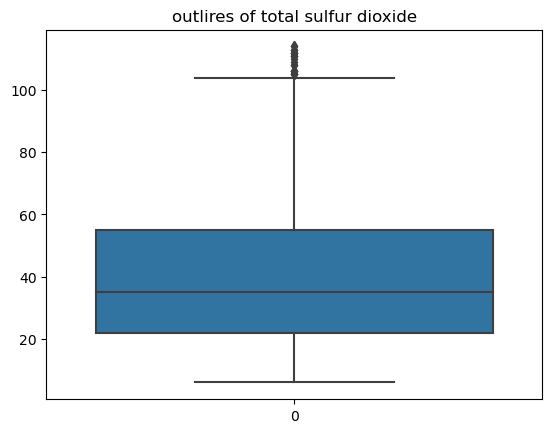

density


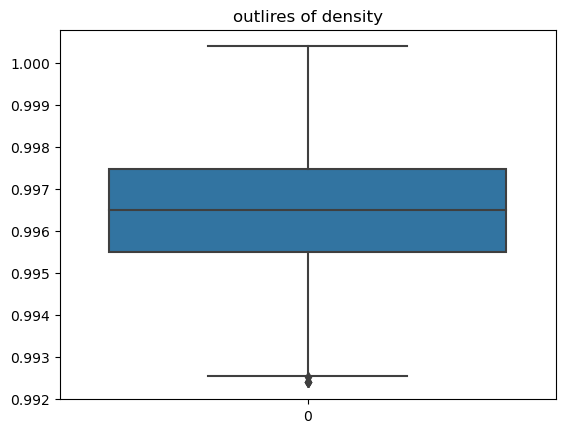

pH


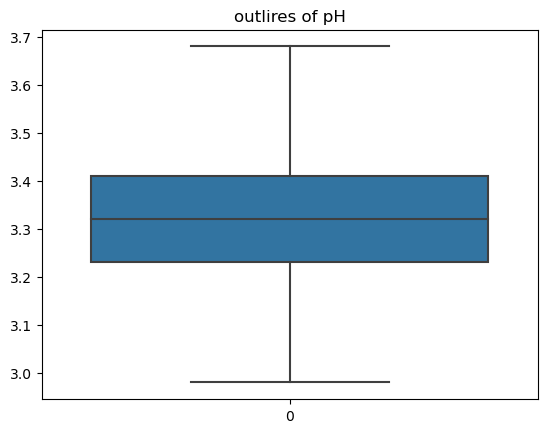

sulphates


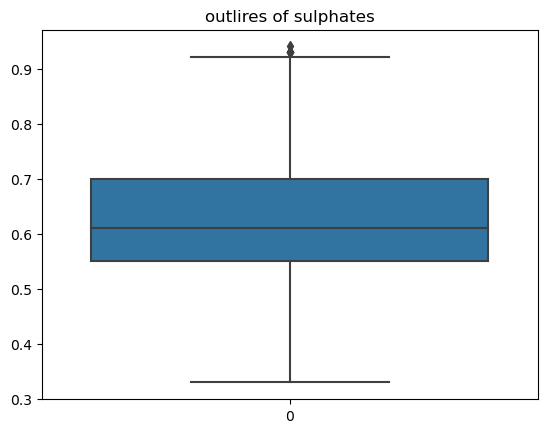

alcohol


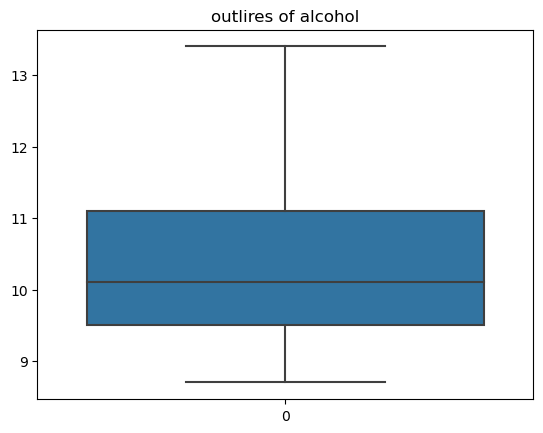

In [238]:
for column in features:
    print(column)
    sns.boxplot(df_copy[column])
    plt.title(f'outlires of {column}')
    plt.show()

<Axes: >

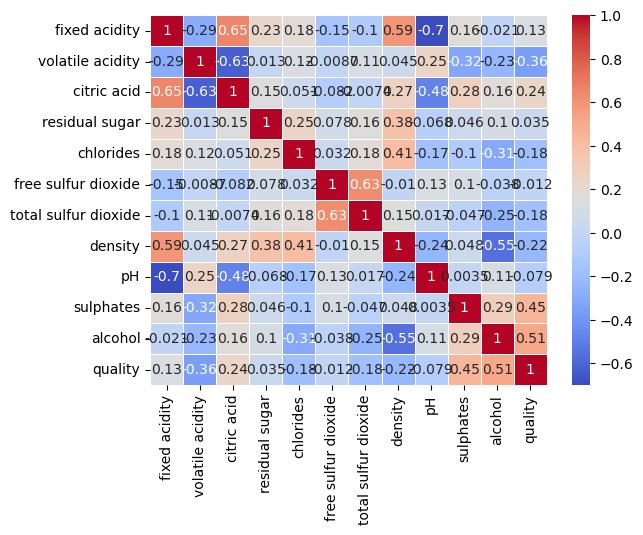

In [239]:
corr=df_copy.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",linewidth=0.5)


In [240]:
x=df_copy.drop(columns=["quality"])
y=df_copy["quality"]


In [241]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(x, y)

In [242]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
x_transformed=scaler.fit_transform(X_resampled)

In [243]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y_resampled)

In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y_encode,test_size=0.2,random_state=34)

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}


In [250]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [251]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    report=classification_report(y_test,y_pred)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:\n{report}\n')

Model: Random Forest
Accuracy: 0.7250
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       0.00      0.00      0.00         7
           2       0.74      0.67      0.70        95
           3       0.55      0.69      0.61        77
           4       0.53      0.48      0.50        21
           5       0.00      0.00      0.00         4

    accuracy                           0.73       280
   macro avg       0.47      0.47      0.47       280
weighted avg       0.71      0.72      0.71       280


Model: Logistic Regression
Accuracy: 0.6964
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        76
           1       0.00      0.00      0.00         7
           2       0.74      0.64      0.69        95
           3       0.55      0.66      0.60        77
           4       0.39      0.33      0.36        21
   

In [252]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Average Accuracy: {:.2f}%".format(scores.mean() * 100))


Average Accuracy: 70.57%


In [255]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200,500],
    'max_depth': [None, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.7316623959000641
Test Accuracy: 0.7392857142857143


In [259]:
best_params= {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

rf_classifier = RandomForestClassifier(**best_params)


In [260]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=50)

In [262]:
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.7071428571428572
